<a href="https://colab.research.google.com/github/Samshritha/Airbnb-Price-Analysis/blob/main/facebook_post_engagement_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 The dataset is from https://archive.ics.uci.edu/ml/datasets/Facebook+metrics. All posts are from the page of a renowned cosmetics brand.



# Objective

Social media managers at a cosmetics brand want to know what makes a Facebook post successful. They're posting content regularly but aren't sure which factors actually drive engagement. This analysis looks at 500 posts to figure out what leads to more likes. Is it the type of content, the timing, or something else entirely? The goal is simple: give clear guidance on what works so the team can create better posts and stop guessing.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [ ]:
fb_like = pd.read_csv('/content/dataset_Facebook.csv', sep=";")
not_needed = ['Page total likes', 'Total Interactions']
fb_like = fb_like.drop(not_needed, axis = 1)
fb_like.head(5)

,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share
0,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0
1,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0
2,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0
3,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0
4,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0


In [ ]:
fb_like.head(5)

,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share
0,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0
1,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0
2,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0
3,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0
4,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0


## Q1 - Modeling with categorical Xs

- Use [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to create dummy variables for the following variables: `Type`, `Category`, `Post Month`, `Post Weekday`, `Post Hour`. Make sure that `drop_firt=True` to avoid multicollinearity problem.
- The origninal columns will be automatically dropped after we create the dummies.
- Convert all columns to numeric type using `pd.to_numeric()` with `errors='coerce'` to handle any non-numeric values.
- Check if any rows have missing variables and drop them accordingly using `dropna()`.
- Create a regression model that uses all the variables (other than like) as independent variables. You'll need to use `statsmodels` and not `sklearn`. Display the OLS Regression Results.  
- No need to split the data to train-test sets for this exercise.

In [ ]:
sms = pd.get_dummies(data=fb_like, columns=["Type", "Category", "Post Month", "Post Weekday", "Post Hour"], drop_first=True)

sms = sms.apply(pd.to_numeric, errors='coerce')
sms.dropna(axis=0, inplace=True)
sms = sms.astype(float)

sms_x = sms.drop(columns=['like'], axis=1)
mod = sm.OLS(endog=sms['like'], exog=sms_x).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                   like   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1229.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):                        0.00
Time:                        01:01:33   Log-Likelihood:                         -2387.4
No. Observations:                 495   AIC:                                      4883.
Df Residuals:                     441   BIC:                                      5110.
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
                                                                          coef    std err          t      P>|t|      [0.

# Bootstrap confidence interval

### The task is to use the bootstrap method to construct a 95% CI for the coefficients for comment and share using a simple model with only comment and share as predictors. Do you get similar CI to Q1? Why or why not?

* Run 5000 bootstrap iterations by sampling from `fb_like` with replacement.
* In each iteration, fit an OLS model using the formula `'like ~ comment+share'`.
* Extract and store the coefficients for comment and share from each iteration.
* Calculate the 95% confidence intervals using the 2.5th and 97.5th percentiles.
* Compare these confidence intervals with those from Q1.

In [ ]:
from tqdm import tqdm
import statsmodels.formula.api as smf

In [ ]:
bootstrapped_ests = []
for i in tqdm(range(5000)):
   fb_like_boot = fb_like.sample(n=len(fb_like), replace=True)
   fb_like_model_boot = smf.ols(formula='like ~ comment+share', data=fb_like).fit()
   bootstrapped_ests.append(fb_like_model_boot.params[['comment','share']])


b_comments, b_shares = zip(*bootstrapped_ests)

print("The 95% bootstrapped CI of b_comments is [{:.2f}, {:.2f}].".format(
    np.percentile(b_comments, 2.5),
    np.percentile(b_comments, 97.5)))

print("The 95% bootstrapped CI of b_shares is [{:.2f}, {:.2f}].".format(
    np.percentile(b_shares, 2.5),
    np.percentile(b_shares, 97.5)))

100%|██████████| 5000/5000 [00:28<00:00, 172.75it/s]

The 95% bootstrapped CI of b_comments is [3.27, 3.27].
The 95% bootstrapped CI of b_shares is [5.46, 5.46].


# Using AIC/BIC for model selection

* Use `LassoLarsIC` to select the best model using the `bic` criterion.
* Prepare the data by dropping the `like` column from `sms` to create `X` and setting `y` as the `like` column.
* Fit the `LassoLarsIC` model on `X` and `y`.
* Identify which X variables are selected by checking which coefficients are non-zero.
* There is no need to split the data to train-test sets for this exercise.

In [ ]:
from sklearn.linear_model import LassoLarsIC


model_bic = LassoLarsIC(criterion="bic")

X = sms.drop(["like"], axis=1)
y = sms["like"]


model_bic.fit(X, y)


LassoLarsIC(criterion='bic')

In [ ]:
model_bic.coef_


array([ 0.00000000e+00, -5.90851034e-04,  1.10856764e-04,  9.83630525e-01,
       -9.83385084e-01,  4.84649227e-03, -9.72524941e-05,  1.13725981e-03,
        2.79802762e-02,  7.62499627e-01,  1.22943433e+00,  0.00000000e+00,
       -9.90044734e+00,  0.00000000e+00,  0.00000000e+00,  2.73543875e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.48300955e+00, -1.46561833e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
attributes = model_bic.coef_>0

# Comparing out-of-sample perormance

* Split the data to 90% train and 10% test set using `random_state=42` for reproducibility.
* Train a scaler using the train set only, then transform both X_train and X_test.
* Train three models using the train set:
   * `LassoLarsIC` model with `criterion="bic"` (uses BIC to select variables)
   * Full Lasso model with `alpha=0.1` and `random_state=42` (includes all X variables)
   * `LassoCV` model with `cv=5` and `random_state=42` (uses CV to select variables)
* Make predictions on the test set for each model and calculate MSE.
* Compare their test-set performance using MSE. The model with the lowest MSE has the best performance.

In [ ]:
from sklearn.linear_model import LassoLarsIC, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

X = sms.drop(["like"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_bic = LassoLarsIC(criterion="bic")
model_bic.fit(X_train_scaled, y_train)
y_pred = model_bic.predict(X_test_scaled)
mse_bic = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
print(mse_bic)

full_model = Lasso(alpha=0.1, random_state=42)
full_model.fit(X_train_scaled, y_train)
y_pred_full = full_model.predict(X_test_scaled)
mse_full = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_full)
print(mse_full)

model_lassoCV = LassoCV(cv=5, random_state=42)
model_lassoCV.fit(X_train_scaled, y_train)
y_pred = model_lassoCV.predict(X_test_scaled)
mse_cv = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
print(mse_cv)


923.7846239338821
794.1045115962896
959.3905184447627


Full Lasso model has the best performance as this model has the lowest MSE


# Visualization - Model Performance Analysis

* Create a figure with two subplots side by side.
* **Left subplot**: Plot actual vs predicted likes using a scatter plot with the Full Lasso model predictions. Add a diagonal reference line to show perfect predictions.
* **Right subplot**: Plot residuals (actual minus predicted) against predicted values to check for patterns in prediction errors. Add a horizontal line at y=0 as reference.
* Add appropriate labels and titles to both plots.
* Use `tight_layout()` to adjust spacing and display the visualization.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

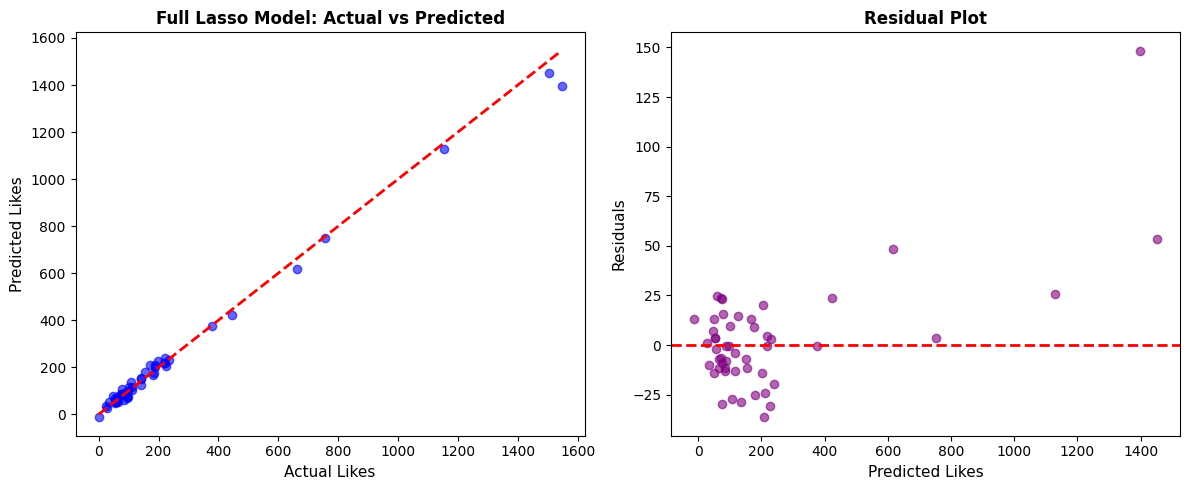

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_full, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Likes', fontsize=11)
plt.ylabel('Predicted Likes', fontsize=11)
plt.title('Full Lasso Model: Actual vs Predicted', fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_full
plt.scatter(y_pred_full, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Likes', fontsize=11)
plt.ylabel('Residuals', fontsize=11)
plt.title('Residual Plot', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary

### Comments and shares have a strong relationship with likes. Posts that get people talking also get more likes. The type of post matters too, with certain formats consistently outperforming others. Timing plays a role, though not as much as you might think. Some hours and days see better engagement, but it's not the biggest factor.
### Many of the individual category and timing variables don't show strong effects on their own. The real story is in combinations. The right type of content at a decent time with early engagement creates momentum.
### The Full Lasso model performed best at predicting likes. This suggests that using all available information with moderate filtering gives better results than aggressively cutting features or over-tuning.